# Glass Classification dataset

## Code

In [1000]:
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from functools import partial
from sklearn import tree

## Sort data

In [1001]:
#sort data
glass_data = pd.read_csv("./test set 1/glass.data", names= ["ID Number", "Refractive Index", 
                                                             "Sodium", "Magnesium", "Aluminum",
                                                             "Silicon", "Potassium", "Calcium",
                                                              "Barium", "Iron", "Type of Glass"
                                                            ])
# drop ID Number, as it is not relevant.
glass_data = glass_data.drop(labels=["ID Number"],axis=1)
print(glass_data.shape)

#need to resort types of glass
#sorting through the original dataset, it is very unbalanced.
#were I to divide it into 0-4 as 1 (windowed glass), 5-7 as 0 (non-windowed glass), the count would be 163:51
print(glass_data['Type of Glass'].value_counts())
#to solve for this, the original dataset did label out float glass (1,3) vs non-float glasses (2,4); count is 87:76, more balanced.
#this will be what will be used for classification purposes.
glass_data = glass_data.loc[~((glass_data['Type of Glass'] == 5) | (glass_data['Type of Glass'] == 6) | (glass_data['Type of Glass'] == 7))]
print(glass_data['Type of Glass'].value_counts())

##finally, sort into float (1) or non-float (0)
glass_data['Type of Glass'] = glass_data['Type of Glass'].replace({1:1, 2:0, 3:1})

(214, 10)
Type of Glass
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64
Type of Glass
2    76
1    70
3    17
Name: count, dtype: int64


## What the data looks like after cleaning

In [1002]:
print(glass_data['Type of Glass'].value_counts())
glass_data

Type of Glass
1    87
0    76
Name: count, dtype: int64


,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
158,1.51776,13.53,3.41,1.52,72.04,0.58,8.79,0.00,0.00,1
159,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.00,0.09,1
160,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,1
161,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,1


In [1003]:
#get X,Y for sake of training later.
XY = glass_data.values
X = XY[:,:-1]
y = XY[:,-1]
XY.shape

#scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)


## Partition data sets, visualize dataset partitions for sanity check!

In [1004]:
#Data partitions (0.8/0.2 training-data, 0.5/0.5 training-to-data, 0.2/0.8 training-to-data)


#80-20 split
Split1X_train, Split1X_test, Split1y_train, Split1y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#50-50 split
Split2X_train, Split2X_test, Split2y_train, Split2y_test = train_test_split(X, y, test_size=0.5, random_state=42)

#20-80 split
Split3X_train, Split3X_test, Split3y_train, Split3y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [1005]:
def vis(X, Y, W=None, b=None):
    indices_neg1 = (Y == 0).nonzero()[0]
    indices_pos1 = (Y == 1).nonzero()[0]
    plt.scatter(X[:,0][indices_neg1], X[:,1][indices_neg1],
                c='blue', label='class 0')
    plt.scatter(X[:,0][indices_pos1], X[:,1][indices_pos1],
                c='red', label='class 1')
    plt.legend()
    plt.xlabel('$x_0$')
    plt.ylabel('$x_1$')

    if W is not None:
        # w0x0+w1x1+b=0 => x1=-w0x0/w1-b/w1
        w0 = W[0]
        w1 = W[1]
        temp = -w1*np.array([X[:,1].min(), X[:,1].max()])/w0-b/w0
        x0_min = max(temp.min(), X[:,0].min())
        x0_max = min(temp.max(), X[:,1].max())
        x0 = np.linspace(x0_min,x0_max,100)
        x1 = -w0*x0/w1-b/w1
        plt.plot(x0,x1,color='black')

    plt.show()

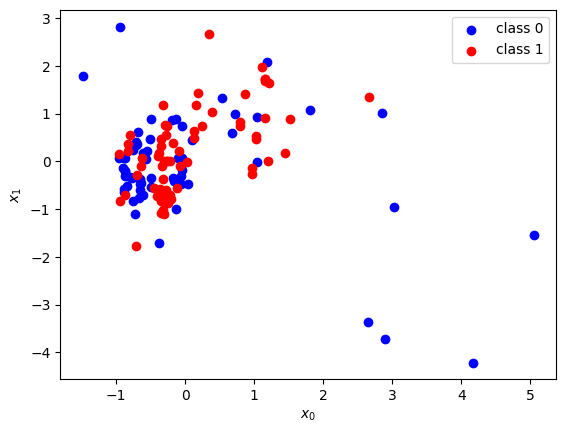

In [1006]:
#more visualization
#Visualize training set as a sanity check; classes (0,1) are being plotted.
vis(Split1X_train, Split1y_train)

# Classifiers

## Partition: 80/20 set

Partition: 0.8
Train Accuracy: 0.7538461538461538
Validation Accuracy: 0.8153846153846154


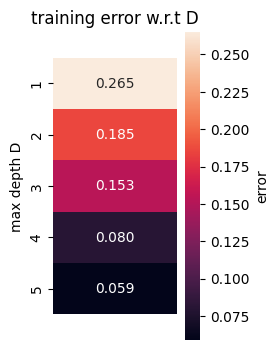

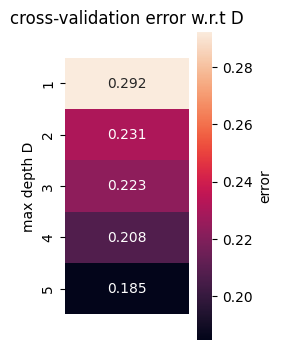

Best max depth D: 5
Test error: 0.303030303030303
Train Accuracy: 0.7230769230769231
Validation Accuracy: 0.8076923076923077


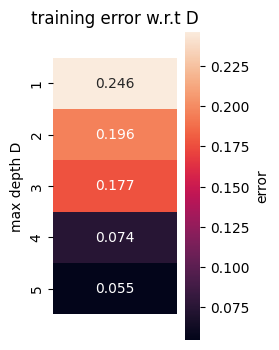

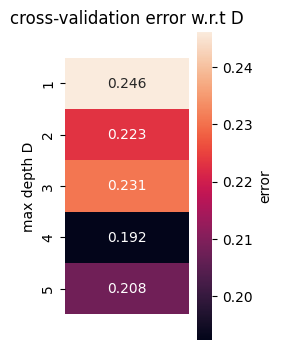

Best max depth D: 4
Test error: 0.18181818181818177
Train Accuracy: 0.7923076923076923
Validation Accuracy: 0.8076923076923077


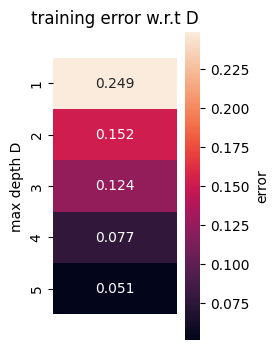

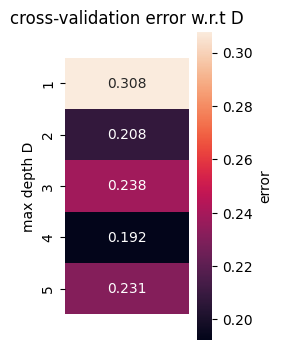

Best max depth D: 4
Test error: 0.36363636363636365


In [1007]:
### Decision Tree ###
DTtestAccuracy_List1=[]
DTtestAccuracy_ListOverall = []
partitions = [0.8]
best_max_depth_overall = 0
DT_best_accuracy = 0
for split in partitions:
    print(f'Partition: {split}')
    for i in range(trial):
        Split1X_train, Split1X_test, Split1y_train, Split1y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        estimator = tree.DecisionTreeClassifier(criterion='entropy', random_state=1)

        D_list = [1, 2, 3, 4, 5]
        param_grid = {'max_depth': D_list}
        cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        grid_search = GridSearchCV(estimator, param_grid, cv= cv, return_train_score=True)
        
        grid_search.fit(Split1X_train, Split1y_train)
        
        # Draw heatmaps for result of grid search.
        def draw_heatmap(errors, D_list, title):
            plt.figure(figsize = (2,4))
            ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
            ax.collections[0].colorbar.set_label('error')
            ax.set(ylabel='max depth D')
            bottom, top = ax.get_ylim()
            ax.set_ylim(bottom + 0.5, top - 0.5)
            plt.title(title)
            plt.show()
    
        training_errors = 1 - grid_search.cv_results_['mean_train_score'].reshape(-1,1)
        cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
        
        train_accuracy = accuracy_score(Split1y_train, best_classifier.predict(Split1X_train))
        validation_accuracy = grid_search.best_score_

        if train_accuracy > DT_best_accuracy:
            DT_best_accuracy = train_accuracy
            best_max_depth_overall = best_max_depth
        print(f'Train Accuracy: {train_accuracy}')
        print(f'Validation Accuracy: {validation_accuracy}')
        
        draw_heatmap(training_errors, D_list, title='training error w.r.t D')
        draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')
        
        best_max_depth = grid_search.best_params_['max_depth']
        print("Best max depth D: {}".format(best_max_depth))
        
        
        test_error = 1 - sum(grid_search.best_estimator_.predict(Split1X_test) == Split1y_test) / len(Split1X_test)
        print("Test error: {}".format(test_error))
        
        testClassifier = DecisionTreeClassifier(max_depth=best_max_depth_overall, criterion="entropy")
        testClassifier.fit(Split1X_train, Split1y_train)
        DTtestAccuracy_List1.append(testClassifier.score(Split1X_test,Split1y_test))
        DTtestAccuracy_ListOverall.append(testClassifier.score(Split1X_test,Split1y_test))


In [ ]:
### Random Forests ###
RFtestAccuracy_List1=[]
RFtestAccuracy_ListOverall = []
partitions = [0.8]
RFbest_max_depth_overall = 0
RF_best_accuracy = 0
for split in partitions:
    print(f'Partition: {split}')
    for i in range(trial):
        Split1X_train, Split1X_test, Split1y_train, Split1y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        estimator = RandomForestClassifier(criterion='entropy', random_state=1)

        D_list = [1, 2, 3, 4, 5]
        param_grid = {'max_depth': D_list}
        cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        grid_search = GridSearchCV(estimator, param_grid, cv= cv, return_train_score=True)
        
        grid_search.fit(Split1X_train, Split1y_train)
        
        # Draw heatmaps for result of grid search.
        def draw_heatmap(errors, D_list, title):
            plt.figure(figsize = (2,4))
            ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
            ax.collections[0].colorbar.set_label('error')
            ax.set(ylabel='max depth D')
            bottom, top = ax.get_ylim()
            ax.set_ylim(bottom + 0.5, top - 0.5)
            plt.title(title)
            plt.show()
    
        training_errors = 1 - grid_search.cv_results_['mean_train_score'].reshape(-1,1)
        cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
        
        train_accuracy = accuracy_score(Split1y_train, best_classifier.predict(Split1X_train))
        validation_accuracy = grid_search.best_score_

        if train_accuracy > RF_best_accuracy:
            RF_best_accuracy = train_accuracy
            RFbest_max_depth_overall = best_max_depth
        print(f'Train Accuracy: {train_accuracy}')
        print(f'Validation Accuracy: {validation_accuracy}')
        
        draw_heatmap(training_errors, D_list, title='training error w.r.t D')
        draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')
        
        best_max_depth = grid_search.best_params_['max_depth']
        print("Best max depth D: {}".format(best_max_depth))
        
        
        test_error = 1 - sum(grid_search.best_estimator_.predict(Split1X_test) == Split1y_test) / len(Split1X_test)
        print("Test error: {}".format(test_error))
        
        testClassifier = RandomForestClassifier(max_depth=RFbest_max_depth_overall, criterion="entropy")
        testClassifier.fit(Split1X_train, Split1y_train)
        RFtestAccuracy_List1.append(testClassifier.score(Split1X_test,Split1y_test))
        RFtestAccuracy_ListOverall.append(testClassifier.score(Split1X_test,Split1y_test))
        

Partition: 0.8


In [ ]:
### Bagging family ###
BFtestAccuracy_List1=[]
BFtestAccuracy_ListOverall = []
partitions = [0.8]
BFbest_max_depth_overall = None
BF_best_accuracy = 0
for split in partitions:
    print(f'Partition: {split}')
    for i in range(trial):
        Split1X_train, Split1X_test, Split1y_train, Split1y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        estimator= tree.DecisionTreeClassifier(criterion='entropy', random_state=i)

        D_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
        param_grid = {
        'estimator__max_depth': D_list,
        'n_estimators': [10],
        'max_samples': [0.5, 1.0],
        'max_features': [0.5, 1.0]
        }
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        grid_search = GridSearchCV(BaggingClassifier(estimator=estimator), param_grid, cv=cv, return_train_score=True)
        grid_search.fit(Split1X_train, Split1y_train)
        
        # Draw heatmaps for result of grid search.
        def draw_heatmap(errors, D_list, title):
            plt.figure(figsize = (3,6))
            ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
            ax.collections[0].colorbar.set_label('error')
            ax.set(ylabel='max depth D')
            bottom, top = ax.get_ylim()
            ax.set_ylim(bottom + 0.5, top - 0.5)
            plt.title(title)
            plt.show()
    
        training_errors = 1 - grid_search.cv_results_['mean_train_score'].reshape(-1,1)
        cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
        
        train_accuracy = accuracy_score(Split1y_train, best_classifier.predict(Split1X_train))
        validation_accuracy = grid_search.best_score_

        if train_accuracy > BF_best_accuracy:
            BF_best_accuracy = train_accuracy
            BFbest_max_depth_overall = best_max_depth
        print(f'Train Accuracy: {train_accuracy}')
        print(f'Validation Accuracy: {validation_accuracy}')
        
        draw_heatmap(training_errors, D_list, title='training error w.r.t D')
        draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')
        
        best_max_depth = grid_search.best_estimator_.estimator.get_params()['max_depth']
        print("Best max depth D: {}".format(best_max_depth))
        
        
        test_error = 1 - sum(grid_search.best_estimator_.predict(Split1X_test) == Split1y_test) / len(Split1X_test)
        print("Test error: {}".format(test_error))
        
        testClassifier = BaggingClassifier(DecisionTreeClassifier(max_depth=BFbest_max_depth_overall, criterion="entropy"))
        testClassifier.fit(Split1X_train, Split1y_train)
        BFtestAccuracy_List1.append(testClassifier.score(Split1X_test,Split1y_test))
        BFtestAccuracy_ListOverall.append(testClassifier.score(Split1X_test,Split1y_test))

In [ ]:
### SVM w/ RBF kernel ###
def calc_error(X, Y, classifier):
    Y_pred = classifier.predict(X)
    e = 1 - accuracy_score(Y, Y_pred)
    return e

# Draw heatmap function
def draw_heatmap(training_errors, gamma_list, C_list):
    plt.figure(figsize=(5, 4))
    ax = sns.heatmap(training_errors, annot=True, fmt='.3f',
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("error")
    ax.set(xlabel=r'$\gamma$', ylabel=r'$C$')
    plt.title(r'Training error w.r.t $C$ and $\gamma$')
    plt.show()

def draw_heatmap2(training_errors, gamma_list, C_list):
    plt.figure(figsize=(5, 4))
    ax = sns.heatmap(training_errors, annot=True, fmt='.3f',
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("error")
    ax.set(xlabel=r'$\gamma$', ylabel=r'$C$')
    plt.title(r'Validation error w.r.t $C$ and $\gamma$')
    plt.show()

# Parameter grid for grid search
C_list = [0.01, 0.1, 1, 10, 100, 1000]
gamma_list = [0.0001, 0.001, 0.01, 0.1]
param_grid = {'C': C_list, 'gamma': gamma_list}

# Data partition and number of trials
partitions = [0.8]
trial = 3
testAccuracy_List1=[]
testAccuracy_ListOverall = []
training_errors = np.zeros((len(C_list), len(gamma_list)))
best_training_accuracy =0
best_C_overall = 0
best_gamma_overall = 0

#run 3 trials per partition
for split in partitions:
    print(f'Partition: {split}')
    for i in range(trial):
        Split1X_train, Split1X_test, Split1y_train, Split1y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        #find optimal hyperparameters
        classifier = SVC()
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        classifier_Search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=cv, return_train_score=True)
        classifier_Search.fit(Split1X_train, Split1y_train)

        best_classifier = classifier_Search.best_estimator_

        #this reports the best C, best gamma best on classifier_Search
        #use for best model to use on test data partitioned (i.e. 20, 50, 80 remaining splits).
        best_C = classifier_Search.best_params_['C']
        best_gamma = classifier_Search.best_params_['gamma']


        print(f"Best C: {best_C}, Best Gamma: {best_gamma}")

        # Calculate the training and validation accuracy
        train_accuracy = accuracy_score(Split1y_train, best_classifier.predict(Split1X_train))
        validation_accuracy = classifier_Search.best_score_

        print(f'Train Accuracy: {train_accuracy}')
        print(f'Validation Accuracy: {validation_accuracy}')
        if train_accuracy > best_training_accuracy:
            best_training_accuracy = train_accuracy
            best_C_overall = best_C
            best_gamma_overall = best_gamma


        training_errors = 1 - classifier_Search.cv_results_['mean_train_score']
        validation_errors = 1 - classifier_Search.cv_results_['mean_test_score']
        draw_heatmap(training_errors.reshape(len(C_list), len(gamma_list)), gamma_list, C_list)
        draw_heatmap2(validation_errors.reshape(len(C_list), len(gamma_list)), gamma_list, C_list)
        bestC= classifier_Search.best_params_['C']
        bestGamma= classifier_Search.best_params_['gamma']
        
        testClassifier = svm.SVC(C=best_C_overall, gamma=best_gamma_overall)
        testClassifier.fit(Split1X_train, Split1y_train)
        testAccuracy_List1.append(testClassifier.score(Split1X_test,Split1y_test))
        testAccuracy_ListOverall.append(testClassifier.score(Split1X_test,Split1y_test))




## Partition: 50/50 set

In [ ]:
### Decision Tree ###
DTtestAccuracy_List2=[]
partitions = [0.5]
for split in partitions:
    print(f'Partition: {split}')
    for i in range(trial):
        Split2X_train, Split2X_test, Split2y_train, Split2y_test = train_test_split(X, y, test_size=0.5, random_state=i)
        estimator = tree.DecisionTreeClassifier(criterion='entropy', random_state=1)

        D_list = [1, 2, 3, 4, 5]
        param_grid = {'max_depth': D_list}
        cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        grid_search = GridSearchCV(estimator, param_grid, cv= cv, return_train_score=True)
        
        grid_search.fit(Split2X_train, Split2y_train)
        
        # Draw heatmaps for result of grid search.
        def draw_heatmap(errors, D_list, title):
            plt.figure(figsize = (2,4))
            ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
            ax.collections[0].colorbar.set_label('error')
            ax.set(ylabel='max depth D')
            bottom, top = ax.get_ylim()
            ax.set_ylim(bottom + 0.5, top - 0.5)
            plt.title(title)
            plt.show()
    
        training_errors = 1 - grid_search.cv_results_['mean_train_score'].reshape(-1,1)
        cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
        
        train_accuracy = accuracy_score(Split2y_train, best_classifier.predict(Split2X_train))
        validation_accuracy = grid_search.best_score_

        print(f'Train Accuracy: {train_accuracy}')
        print(f'Validation Accuracy: {validation_accuracy}')
        
        if train_accuracy > DT_best_accuracy:
            DT_best_accuracy = train_accuracy
            best_max_depth_overall = best_max_depth
        
        draw_heatmap(training_errors, D_list, title='training error w.r.t D')
        draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')
        
        best_max_depth = grid_search.best_params_['max_depth']
        print("Best max depth D: {}".format(best_max_depth))
        
        
        test_error = 1 - sum(grid_search.best_estimator_.predict(Split2X_test) == Split2y_test) / len(Split2X_test)
        print("Test error: {}".format(test_error))
        
        testClassifier = DecisionTreeClassifier(max_depth=best_max_depth_overall, criterion="entropy")
        testClassifier.fit(Split2X_train, Split2y_train)
        DTtestAccuracy_List2.append(testClassifier.score(Split2X_test,Split2y_test))
        DTtestAccuracy_ListOverall.append(testClassifier.score(Split2X_test,Split2y_test))

In [ ]:
### Random Forests ###
RFtestAccuracy_List2=[]
partitions = [0.5]
for split in partitions:
    print(f'Partition: {split}')
    for i in range(trial):
        Split2X_train, Split2X_test, Split2y_train, Split2y_test = train_test_split(X, y, test_size=0.5, random_state=i)
        estimator = RandomForestClassifier(criterion='entropy', random_state=1)

        D_list = [1, 2, 3, 4, 5]
        param_grid = {'max_depth': D_list}
        cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        grid_search = GridSearchCV(estimator, param_grid, cv= cv, return_train_score=True)
        
        grid_search.fit(Split2X_train, Split2y_train)
        
        # Draw heatmaps for result of grid search.
        def draw_heatmap(errors, D_list, title):
            plt.figure(figsize = (2,4))
            ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
            ax.collections[0].colorbar.set_label('error')
            ax.set(ylabel='max depth D')
            bottom, top = ax.get_ylim()
            ax.set_ylim(bottom + 0.5, top - 0.5)
            plt.title(title)
            plt.show()
    
        training_errors = 1 - grid_search.cv_results_['mean_train_score'].reshape(-1,1)
        cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
        
        train_accuracy = accuracy_score(Split2y_train, best_classifier.predict(Split2X_train))
        validation_accuracy = grid_search.best_score_

        if train_accuracy > RF_best_accuracy:
            RF_best_accuracy = train_accuracy
            RFbest_max_depth_overall = best_max_depth
        print(f'Train Accuracy: {train_accuracy}')
        print(f'Validation Accuracy: {validation_accuracy}')
        
        draw_heatmap(training_errors, D_list, title='training error w.r.t D')
        draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')
        
        best_max_depth = grid_search.best_params_['max_depth']
        print("Best max depth D: {}".format(best_max_depth))
        
        
        test_error = 1 - sum(grid_search.best_estimator_.predict(Split2X_test) == Split2y_test) / len(Split2X_test)
        print("Test error: {}".format(test_error))
        
        testClassifier = RandomForestClassifier(max_depth=RFbest_max_depth_overall, criterion="entropy")
        testClassifier.fit(Split2X_train, Split2y_train)
        RFtestAccuracy_List2.append(testClassifier.score(Split2X_test,Split2y_test))
        RFtestAccuracy_ListOverall.append(testClassifier.score(Split2X_test,Split2y_test))
        

In [ ]:
### Bagging family ###
BFtestAccuracy_List2=[]
partitions = [0.5]

for split in partitions:
    print(f'Partition: {split}')
    for i in range(trial):
        Split2X_train, Split2X_test, Split2y_train, Split2y_test = train_test_split(X, y, test_size=0.5, random_state=i)
        estimator= tree.DecisionTreeClassifier(criterion='entropy', random_state=i)

        D_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
        param_grid = {
        'estimator__max_depth': D_list,
        'n_estimators': [10],
        'max_samples': [0.5, 1.0],
        'max_features': [0.5, 1.0]
        }
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        grid_search = GridSearchCV(BaggingClassifier(estimator=estimator), param_grid, cv=cv, return_train_score=True)
        grid_search.fit(Split2X_train, Split2y_train)
        
        # Draw heatmaps for result of grid search.
        def draw_heatmap(errors, D_list, title):
            plt.figure(figsize = (3,6))
            ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
            ax.collections[0].colorbar.set_label('error')
            ax.set(ylabel='max depth D')
            bottom, top = ax.get_ylim()
            ax.set_ylim(bottom + 0.5, top - 0.5)
            plt.title(title)
            plt.show()
    
        training_errors = 1 - grid_search.cv_results_['mean_train_score'].reshape(-1,1)
        cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
        
        train_accuracy = accuracy_score(Split2y_train, best_classifier.predict(Split2X_train))
        validation_accuracy = grid_search.best_score_

        if train_accuracy > BF_best_accuracy:
            BF_best_accuracy = train_accuracy
            BFbest_max_depth_overall = best_max_depth
        print(f'Train Accuracy: {train_accuracy}')
        print(f'Validation Accuracy: {validation_accuracy}')
        
        draw_heatmap(training_errors, D_list, title='training error w.r.t D')
        draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')
        
        best_max_depth = grid_search.best_estimator_.estimator.get_params()['max_depth']
        print("Best max depth D: {}".format(best_max_depth))
        
        
        test_error = 1 - sum(grid_search.best_estimator_.predict(Split2X_test) == Split2y_test) / len(Split2X_test)
        print("Test error: {}".format(test_error))
        
        testClassifier = BaggingClassifier(DecisionTreeClassifier(max_depth=BFbest_max_depth_overall, criterion="entropy"))
        testClassifier.fit(Split2X_train, Split2y_train)
        BFtestAccuracy_List2.append(testClassifier.score(Split2X_test,Split2y_test))
        BFtestAccuracy_ListOverall.append(testClassifier.score(Split2X_test,Split2y_test))

In [ ]:
### SVM w/ RBF kernel ###
def calc_error(X, Y, classifier):
    Y_pred = classifier.predict(X)
    e = 1 - accuracy_score(Y, Y_pred)
    return e

# Draw heatmap function
def draw_heatmap(training_errors, gamma_list, C_list):
    plt.figure(figsize=(5, 4))
    ax = sns.heatmap(training_errors, annot=True, fmt='.3f',
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("error")
    ax.set(xlabel=r'$\gamma$', ylabel=r'$C$')
    plt.title(r'Training error w.r.t $C$ and $\gamma$')
    plt.show()

def draw_heatmap2(training_errors, gamma_list, C_list):
    plt.figure(figsize=(5, 4))
    ax = sns.heatmap(training_errors, annot=True, fmt='.3f',
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("error")
    ax.set(xlabel=r'$\gamma$', ylabel=r'$C$')
    plt.title(r'Validation error w.r.t $C$ and $\gamma$')
    plt.show()

# Parameter grid for grid search
C_list = [0.01, 0.1, 1, 10, 100, 1000]
gamma_list = [0.0001, 0.001, 0.01, 0.1]
param_grid = {'C': C_list, 'gamma': gamma_list}

# Data partition and number of trials
partitions = [0.5]
trial = 3
testAccuracy_List2=[]
training_errors = np.zeros((len(C_list), len(gamma_list)))


#run 3 trials per partition
for split in partitions:
    print(f'Partition: {split}')
    for i in range(trial):
        Split2X_train, Split2X_test, Split2y_train, Split2y_test = train_test_split(X, y, test_size=0.5, random_state=i)

        #find optimal hyperparameters
        classifier = SVC()
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        classifier_Search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=cv, return_train_score=True)
        classifier_Search.fit(Split2X_train, Split2y_train)

        best_classifier = classifier_Search.best_estimator_

        #this reports the best C, best gamma best on classifier_Search
        #use for best model to use on test data partitioned (i.e. 20, 50, 80 remaining splits).
        best_C = classifier_Search.best_params_['C']
        best_gamma = classifier_Search.best_params_['gamma']

        print(f"Best C: {best_C}, Best Gamma: {best_gamma}")


        # Calculate the training and validation accuracy
        train_accuracy = accuracy_score(Split2y_train, best_classifier.predict(Split2X_train))
        validation_accuracy = classifier_Search.best_score_

        print(f'Train Accuracy: {train_accuracy}')
        print(f'Validation Accuracy: {validation_accuracy}')

        training_errors = 1 - classifier_Search.cv_results_['mean_train_score']
        validation_errors = 1 - classifier_Search.cv_results_['mean_test_score']
        if train_accuracy > best_training_accuracy:
            best_training_accuracy = train_accuracy
            best_C_overall = best_C
            best_gamma_overall = best_gamma

        draw_heatmap(training_errors.reshape(len(C_list), len(gamma_list)), gamma_list, C_list)
        draw_heatmap2(validation_errors.reshape(len(C_list), len(gamma_list)), gamma_list, C_list)
        bestC= classifier_Search.best_params_['C']
        bestGamma= classifier_Search.best_params_['gamma']
        
        testClassifier = svm.SVC(C=best_C_overall, gamma=best_gamma_overall)
        testClassifier.fit(Split2X_train, Split2y_train)
        testAccuracy_List2.append(testClassifier.score(Split2X_test,Split2y_test))
        testAccuracy_ListOverall.append(testClassifier.score(Split2X_test,Split2y_test))


## Partition: 20/80 set

In [ ]:
### Decision Tree ###
DTtestAccuracy_List3=[]
partitions = [0.2]
for split in partitions:
    print(f'Partition: {split}')
    for i in range(trial):
        Split3X_train, Split3X_test, Split3y_train, Split3y_test = train_test_split(X, y, test_size=0.8, random_state=i)
        estimator = tree.DecisionTreeClassifier(criterion='entropy', random_state=1)

        D_list = [1, 2, 3, 4, 5]
        param_grid = {'max_depth': D_list}
        cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        grid_search = GridSearchCV(estimator, param_grid, cv= cv, return_train_score=True)
        
        grid_search.fit(Split3X_train, Split3y_train)
        
        # Draw heatmaps for result of grid search.
        def draw_heatmap(errors, D_list, title):
            plt.figure(figsize = (2,4))
            ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
            ax.collections[0].colorbar.set_label('error')
            ax.set(ylabel='max depth D')
            bottom, top = ax.get_ylim()
            ax.set_ylim(bottom + 0.5, top - 0.5)
            plt.title(title)
            plt.show()
    
        training_errors = 1 - grid_search.cv_results_['mean_train_score'].reshape(-1,1)
        cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
        
        train_accuracy = accuracy_score(Split3y_train, best_classifier.predict(Split3X_train))
        validation_accuracy = grid_search.best_score_

        print(f'Train Accuracy: {train_accuracy}')
        print(f'Validation Accuracy: {validation_accuracy}')
        
        if train_accuracy > DT_best_accuracy:
            DT_best_accuracy = train_accuracy
            best_max_depth_overall = best_max_depth
        
        draw_heatmap(training_errors, D_list, title='training error w.r.t D')
        draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')
        
        best_max_depth = grid_search.best_params_['max_depth']
        print("Best max depth D: {}".format(best_max_depth))
        
        
        test_error = 1 - sum(grid_search.best_estimator_.predict(Split3X_test) == Split3y_test) / len(Split3X_test)
        print("Test error: {}".format(test_error))
        
        testClassifier = DecisionTreeClassifier(max_depth=best_max_depth_overall, criterion="entropy")
        testClassifier.fit(Split3X_train, Split3y_train)
        DTtestAccuracy_List3.append(testClassifier.score(Split3X_test,Split3y_test))
        DTtestAccuracy_ListOverall.append(testClassifier.score(Split3X_test,Split3y_test))

In [ ]:
### Random Forests ###
RFtestAccuracy_List3=[]
partitions = [0.2]
for split in partitions:
    print(f'Partition: {split}')
    for i in range(trial):
        Split3X_train, Split3X_test, Split3y_train, Split3y_test = train_test_split(X, y, test_size=0.8, random_state=i)
        estimator = RandomForestClassifier(criterion='entropy', random_state=1)

        D_list = [1, 2, 3, 4, 5]
        param_grid = {'max_depth': D_list}
        cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        grid_search = GridSearchCV(estimator, param_grid, cv= cv, return_train_score=True)
        
        grid_search.fit(Split3X_train, Split3y_train)
        
        # Draw heatmaps for result of grid search.
        def draw_heatmap(errors, D_list, title):
            plt.figure(figsize = (2,4))
            ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
            ax.collections[0].colorbar.set_label('error')
            ax.set(ylabel='max depth D')
            bottom, top = ax.get_ylim()
            ax.set_ylim(bottom + 0.5, top - 0.5)
            plt.title(title)
            plt.show()
    
        training_errors = 1 - grid_search.cv_results_['mean_train_score'].reshape(-1,1)
        cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
        
        train_accuracy = accuracy_score(Split3y_train, best_classifier.predict(Split3X_train))
        validation_accuracy = grid_search.best_score_

        if train_accuracy > RF_best_accuracy:
            RF_best_accuracy = train_accuracy
            RFbest_max_depth_overall = best_max_depth
        print(f'Train Accuracy: {train_accuracy}')
        print(f'Validation Accuracy: {validation_accuracy}')
        
        draw_heatmap(training_errors, D_list, title='training error w.r.t D')
        draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')
        
        best_max_depth = grid_search.best_params_['max_depth']
        print("Best max depth D: {}".format(best_max_depth))
        
        
        test_error = 1 - sum(grid_search.best_estimator_.predict(Split3X_test) == Split3y_test) / len(Split3X_test)
        print("Test error: {}".format(test_error))
        
        testClassifier = RandomForestClassifier(max_depth=RFbest_max_depth_overall, criterion="entropy")
        testClassifier.fit(Split3X_train, Split3y_train)
        RFtestAccuracy_List3.append(testClassifier.score(Split3X_test,Split3y_test))
        RFtestAccuracy_ListOverall.append(testClassifier.score(Split3X_test,Split3y_test))
        

In [ ]:
### Bagging family ###
BFtestAccuracy_List3=[]
partitions = [0.2]
for split in partitions:
    print(f'Partition: {split}')
    for i in range(trial):
        Split3X_train, Split3X_test, Split3y_train, Split3y_test = train_test_split(X, y, test_size=0.8, random_state=i)
        estimator= tree.DecisionTreeClassifier(criterion='entropy', random_state=i)

        D_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
        param_grid = {
        'estimator__max_depth': D_list,
        'n_estimators': [10],
        'max_samples': [0.5, 1.0],
        'max_features': [0.5, 1.0]
        }
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        grid_search = GridSearchCV(BaggingClassifier(estimator=estimator), param_grid, cv=cv, return_train_score=True)
        grid_search.fit(Split3X_train, Split3y_train)
        
        # Draw heatmaps for result of grid search.
        def draw_heatmap(errors, D_list, title):
            plt.figure(figsize = (3,6))
            ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
            ax.collections[0].colorbar.set_label('error')
            ax.set(ylabel='max depth D')
            bottom, top = ax.get_ylim()
            ax.set_ylim(bottom + 0.5, top - 0.5)
            plt.title(title)
            plt.show()
    
        training_errors = 1 - grid_search.cv_results_['mean_train_score'].reshape(-1,1)
        cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
        
        train_accuracy = accuracy_score(Split3y_train, best_classifier.predict(Split3X_train))
        validation_accuracy = grid_search.best_score_

        if train_accuracy > BF_best_accuracy:
            BF_best_accuracy = train_accuracy
            BFbest_max_depth_overall = best_max_depth
        print(f'Train Accuracy: {train_accuracy}')
        print(f'Validation Accuracy: {validation_accuracy}')
        
        draw_heatmap(training_errors, D_list, title='training error w.r.t D')
        draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')
        
        best_max_depth = grid_search.best_estimator_.estimator.get_params()['max_depth']
        print("Best max depth D: {}".format(best_max_depth))
        
        
        test_error = 1 - sum(grid_search.best_estimator_.predict(Split3X_test) == Split3y_test) / len(Split3X_test)
        print("Test error: {}".format(test_error))
        
        testClassifier = BaggingClassifier(DecisionTreeClassifier(max_depth=BFbest_max_depth_overall, criterion="entropy"))
        testClassifier.fit(Split2X_train, Split2y_train)
        BFtestAccuracy_List3.append(testClassifier.score(Split3X_test,Split3y_test))
        BFtestAccuracy_ListOverall.append(testClassifier.score(Split3X_test,Split3y_test))

In [ ]:
### SVM w/ RBF kernel ###
def calc_error(X, Y, classifier):
    Y_pred = classifier.predict(X)
    e = 1 - accuracy_score(Y, Y_pred)
    return e

# Draw heatmap function
def draw_heatmap(training_errors, gamma_list, C_list):
    plt.figure(figsize=(5, 4))
    ax = sns.heatmap(training_errors, annot=True, fmt='.3f',
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("error")
    ax.set(xlabel=r'$\gamma$', ylabel=r'$C$')
    plt.title(r'Training error w.r.t $C$ and $\gamma$')
    plt.show()

def draw_heatmap2(training_errors, gamma_list, C_list):
    plt.figure(figsize=(5, 4))
    ax = sns.heatmap(training_errors, annot=True, fmt='.3f',
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("error")
    ax.set(xlabel=r'$\gamma$', ylabel=r'$C$')
    plt.title(r'Validation error w.r.t $C$ and $\gamma$')
    plt.show()

# Parameter grid for grid search
C_list = [0.01, 0.1, 1, 10, 100, 1000]
gamma_list = [0.0001, 0.001, 0.01, 0.1]
param_grid = {'C': C_list, 'gamma': gamma_list}

# Data partition and number of trials
partitions = [0.2]
trial = 3
testAccuracy_List3=[]
training_errors = np.zeros((len(C_list), len(gamma_list)))


#run 3 trials per partition
for split in partitions:
    print(f'Partition: {split}')
    for i in range(trial):
        Split3X_train, Split3X_test, Split3y_train, Split3y_test = train_test_split(X, y, test_size=0.8, random_state=i)

        #find optimal hyperparameters
        classifier = SVC()
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        classifier_Search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=cv, return_train_score=True)
        classifier_Search.fit(Split3X_train, Split3y_train)

        best_classifier = classifier_Search.best_estimator_

        #this reports the best C, best gamma best on classifier_Search
        #use for best model to use on test data partitioned (i.e. 20, 50, 80 remaining splits).
        best_C = classifier_Search.best_params_['C']
        best_gamma = classifier_Search.best_params_['gamma']
        if best_C > best_C_split:
            best_C_split = best_C

        print(f"Best C: {best_C}, Best Gamma: {best_gamma}")

        # Calculate the training and validation accuracy
        train_accuracy = accuracy_score(Split3y_train, best_classifier.predict(X_train))
        validation_accuracy = classifier_Search.best_score_

        print(f'Train Accuracy: {train_accuracy}')
        print(f'Validation Accuracy: {validation_accuracy}')
        if train_accuracy > best_training_accuracy:
            best_training_accuracy = train_accuracy
            best_C_overall = best_C
            best_gamma_overall = best_gamma

        training_errors = 1 - classifier_Search.cv_results_['mean_train_score']
        validation_errors = 1 - classifier_Search.cv_results_['mean_test_score']
        draw_heatmap(training_errors.reshape(len(C_list), len(gamma_list)), gamma_list, C_list)
        draw_heatmap2(validation_errors.reshape(len(C_list), len(gamma_list)), gamma_list, C_list)
        bestC= classifier_Search.best_params_['C']
        bestGamma= classifier_Search.best_params_['gamma']
        
        testClassifier = svm.SVC(C=best_C_overall, gamma=best_gamma_overall)
        testClassifier.fit(Split3X_train, Split3y_train)
        testAccuracy_ListOverall.append(testClassifier.score(Split3X_test,Split3y_test))
        testAccuracy_List3.append(testClassifier.score(Split3X_test,Split3y_test))


## Best training accuracy with optimal Hyperparameter

In [ ]:
### Report best training accuracies with their optimal hyperparameters. ###
print(f'Best training accuracy for Decision Tree: {DT_best_accuracy} with optimal hyperparameter D:{best_max_depth_overall}.')
print(f'Best training accuracy for SVM w/RBF: {best_training_accuracy} with optimal hyperparameter C:{best_C_overall} and gamma:{best_gamma_overall}')
print(f'Best training accuracy for Random Forests: {RF_best_accuracy} with optimal hyperparameter D:{RFbest_max_depth_overall}.')
print(f'Best training accuracy for Bagging family: {BF_best_accuracy} with optimal hyperparameter D:{BFbest_max_depth_overall}.')

## Report test data respective average accuracy.

In [ ]:
### Decision Tree ###
print(f'The average of the test accuracies for Decision Tree is: {sum(DTtestAccuracy_ListOverall) / len(DTtestAccuracy_ListOverall)}')
print(f'The average of the test accuracies for  80/20 split Decision Tree is: {sum(DTtestAccuracy_List1) / len(DTtestAccuracy_List1)}')
print(f'The average of the test accuracies for  50/50 split Decision Tree is: {sum(DTtestAccuracy_List2) / len(DTtestAccuracy_List2)}')
print(f'The average of the test accuracies for  20/80 split Decision Tree is: {sum(DTtestAccuracy_List3) / len(DTtestAccuracy_List3)}')

In [ ]:
### Random Forests ###
print(f'The average of the test accuracies for Random Forests is: {sum(RFtestAccuracy_ListOverall) / len(RFtestAccuracy_ListOverall)}')
print(f'The average of the test accuracies for 80/20 Random Forests is: {sum(RFtestAccuracy_List1) / len(RFtestAccuracy_List1)}')
print(f'The average of the test accuracies for 50/50 Random Forests is: {sum(RFtestAccuracy_List1) / len(RFtestAccuracy_List1)}')
print(f'The average of the test accuracies for 20/80 Random Forests is: {sum(RFtestAccuracy_List1) / len(RFtestAccuracy_List1)}')

In [ ]:
### Bagging family ### 
print(f'The average of the test accuracies for Bagging family is: {sum(BFtestAccuracy_ListOverall) / len(BFtestAccuracy_ListOverall)}')
print(f'The average of the test accuracies for 80/20 Bagging family is: {sum(BFtestAccuracy_List1) / len(BFtestAccuracy_List1)}')
print(f'The average of the test accuracies for 50/50 Bagging family is: {sum(BFtestAccuracy_List2) / len(BFtestAccuracy_List2)}')
print(f'The average of the test accuracies for 20/80 Bagging family is: {sum(BFtestAccuracy_List3) / len(BFtestAccuracy_List3)}')

In [ ]:
### SVM w/RBF kernel ###
print(f'The average of the test accuracies for SVM w/RBF is: {sum(testAccuracy_ListOverall) / len(testAccuracy_ListOverall)}')
print(f'The average of the test accuracies for 80/20 split SVM w/RBF is: {sum(testAccuracy_List1) / len(testAccuracy_List1)}')
print(f'The average of the test accuracies for 50/50 split SVM w/RBF is: {sum(testAccuracy_List2) / len(testAccuracy_List2)}')
print(f'The average of the test accuracies for 20/80 split SVM w/RBF is: {sum(testAccuracy_List3) / len(testAccuracy_List3)}')